<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Titanic-:-Machine-Learning-from-Disaster" data-toc-modified-id="Titanic-:-Machine-Learning-from-Disaster-1">Titanic : Machine Learning from Disaster</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1.1">Importing Libraries</a></span></li></ul></li><li><span><a href="#Data-Import" data-toc-modified-id="Data-Import-2">Data Import</a></span><ul class="toc-item"><li><span><a href="#Importing-train-and-test-files" data-toc-modified-id="Importing-train-and-test-files-2.1">Importing train and test files</a></span></li><li><span><a href="#Data-Analysis-:--Duplicate-check,-Missing-Value" data-toc-modified-id="Data-Analysis-:--Duplicate-check,-Missing-Value-2.2">Data Analysis :- Duplicate check, Missing Value</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3">Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Pie-Chart-of-Survived-Passengers" data-toc-modified-id="Pie-Chart-of-Survived-Passengers-3.1">Pie Chart of Survived Passengers</a></span></li><li><span><a href="#P-Class" data-toc-modified-id="P-Class-3.2">P Class</a></span></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-3.3">Distributions</a></span></li><li><span><a href="#Scatter-plot" data-toc-modified-id="Scatter-plot-3.4">Scatter plot</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-3.5">Correlation</a></span></li><li><span><a href="#Age-Distribution" data-toc-modified-id="Age-Distribution-3.6">Age Distribution</a></span></li><li><span><a href="#SibSp---Family-Relations-of-Passengers" data-toc-modified-id="SibSp---Family-Relations-of-Passengers-3.7">SibSp - Family Relations of Passengers</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4">Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Label-Encoding" data-toc-modified-id="Label-Encoding-4.1">Label Encoding</a></span></li><li><span><a href="#Train-and-Test-Split" data-toc-modified-id="Train-and-Test-Split-4.2">Train and Test Split</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-4.3">Model Training</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-4.3.1">Decision Tree Classifier</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.3.2">Logistic Regression</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4.3.3">XGBoost</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.3.4">Random Forest</a></span></li></ul></li></ul></li></ul></div>

# Titanic : Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15,
1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out
of 2224 passengers and crew. This sensational tragedy shocked the international community
and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough
lifeboats for the passengers and crew. Although there was some element of luck involved in
surviving the sinking, some groups of people were more likely to survive than others, such as
women, children, and the upper-class.

In this project, we would perform the analysis of what sorts of people were likely to
survive. In particular, we would apply the tools of machine learning to predict which
passengers survived the tragedy.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(palette='inferno')
import matplotlib.pyplot as plt

#  Data Import
## Importing train and test files

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


## Data Analysis :- Duplicate check, Missing Value

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isna().sum()/ len(train)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [3]:
train.replace(to_replace=np.nan,value=round(train.mean(),0), inplace=True)

In [4]:
train.fillna('missing', inplace=True)

In [48]:
train.isna().sum()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.000000
Embarked    0.000000
AgeRange    0.015713
dtype: float64

In [5]:
test.replace(to_replace=np.nan,value=round(test.mean(),0), inplace=True)
test.fillna('missing', inplace=True)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
train['Age']=train['Age'].astype('int64')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 83.6+ KB


In [7]:
test['Age']=test['Age'].astype('int64')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 36.0+ KB


# Exploratory Data Analysis

## Pie Chart of Survived Passengers

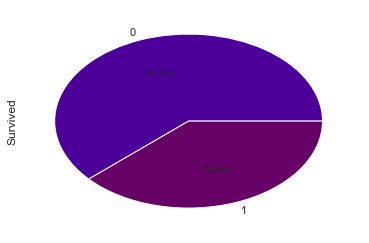

In [16]:
train['Survived'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors=["#4C0099", "#660066"])

## P Class
Pclass defines the class of the passengers, 1=Upper, 2=middle, 3=lower class.

P Class vs Fare is shown below .

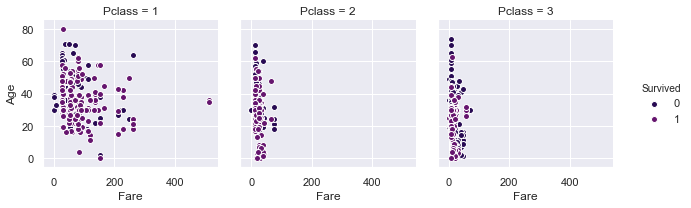

In [12]:
g=sns.FacetGrid(train, hue="Survived", col="Pclass", margin_titles=True)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

As the Upper class suggests , the Fare is highest in this class, and it seems to be decreasing as class degrades.

If we see below graph that P Class vs Age , we can see lower class has youngest passengers .

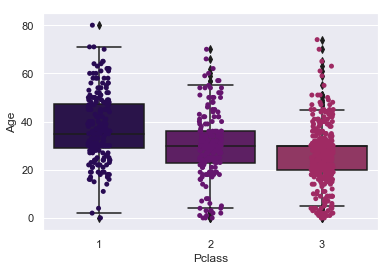

In [15]:
ax= sns.boxplot(x="Pclass", y="Age", data=train)
ax= sns.stripplot(x="Pclass", y="Age", data=train,  edgecolor="gray")
plt.show()

One thing to notice will be Correlation between Age and Fare.

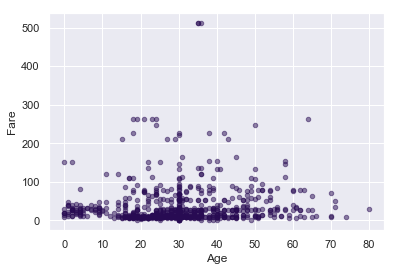

In [16]:
train.plot(kind='scatter', x='Age', y='Fare',alpha = 0.5)

## Distributions

It would be interesting to see the distributions of all numerical column.

<Figure size 432x288 with 0 Axes>

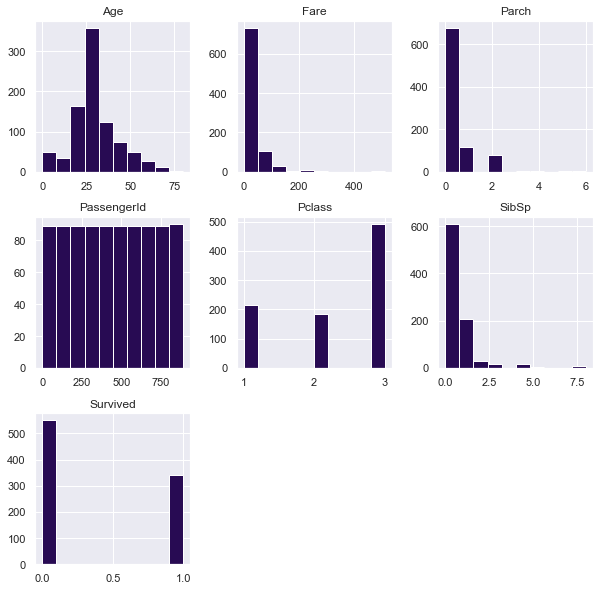

<Figure size 432x288 with 0 Axes>

In [18]:
train.hist(figsize=(10,10))
plt.figure()

## Scatter plot

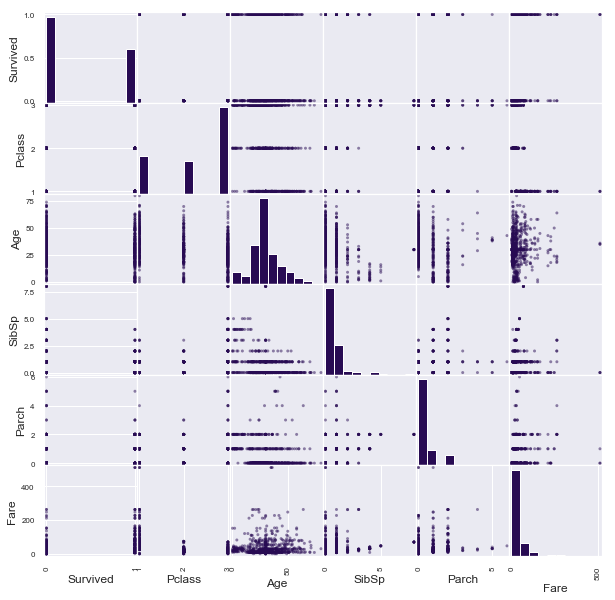

<Figure size 432x288 with 0 Axes>

In [27]:
pd.plotting.scatter_matrix(train,figsize=(10,10))
plt.figure();

## Correlation

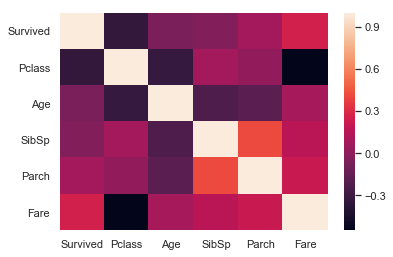

In [28]:
sns.heatmap(train.corr())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


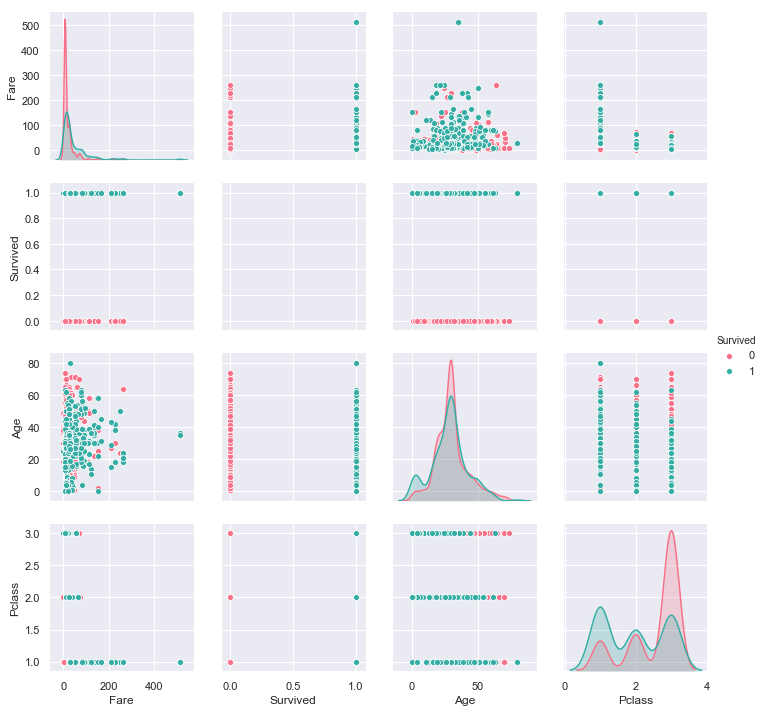

In [30]:
sns.pairplot(data=train[["Fare","Survived","Age","Pclass"]],hue="Survived",palette="husl",dropna=True)

## Age Distribution 

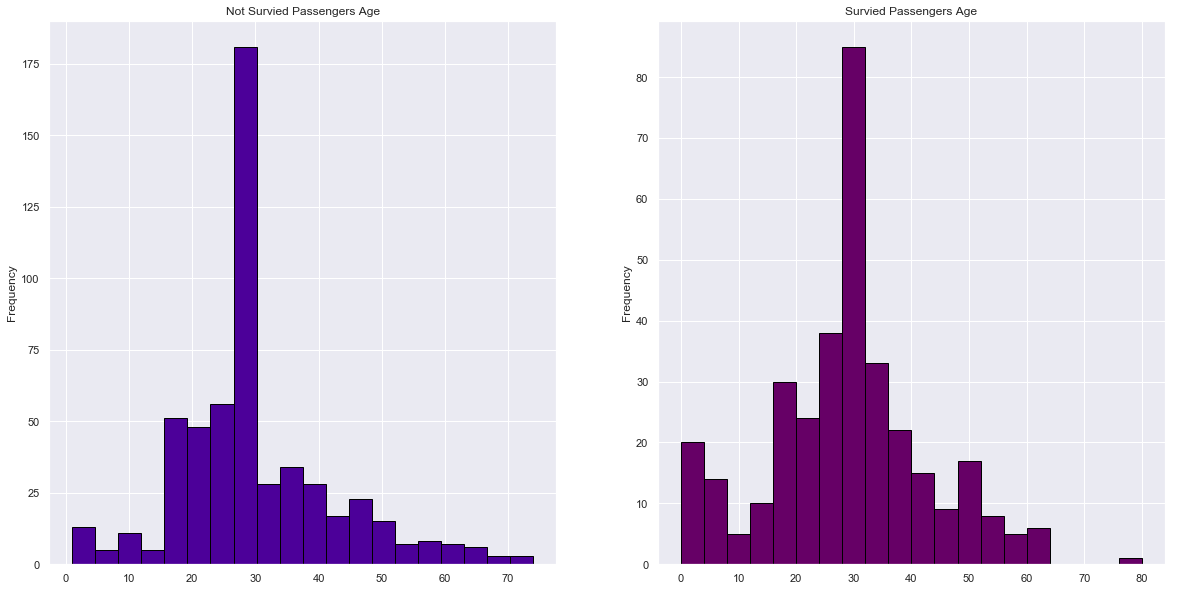

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='#4C0099')
ax[0].set_title('Not Survied Passengers Age')
train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='#660066',bins=20,edgecolor='black')
ax[1].set_title('Survied Passengers Age')
plt.show()

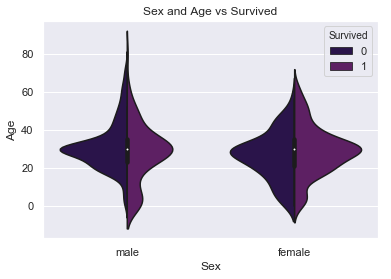

In [34]:
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True)
plt.title('Sex and Age vs Survived')
plt.show()

In [23]:
pd.crosstab(train['Survived'], train['Sex']).apply(lambda r: round(r/len(train) *100 ,2), axis=1)

Sex,female,male
Survived,,
0,9.09,52.53
1,26.15,12.23


We see that 61% of people did not survive and 52% of them were men , most probably in the age of 20-50 .Those who survived were mostly Children , as well as 26 % of them were female too.

## SibSp - Family Relations of Passengers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


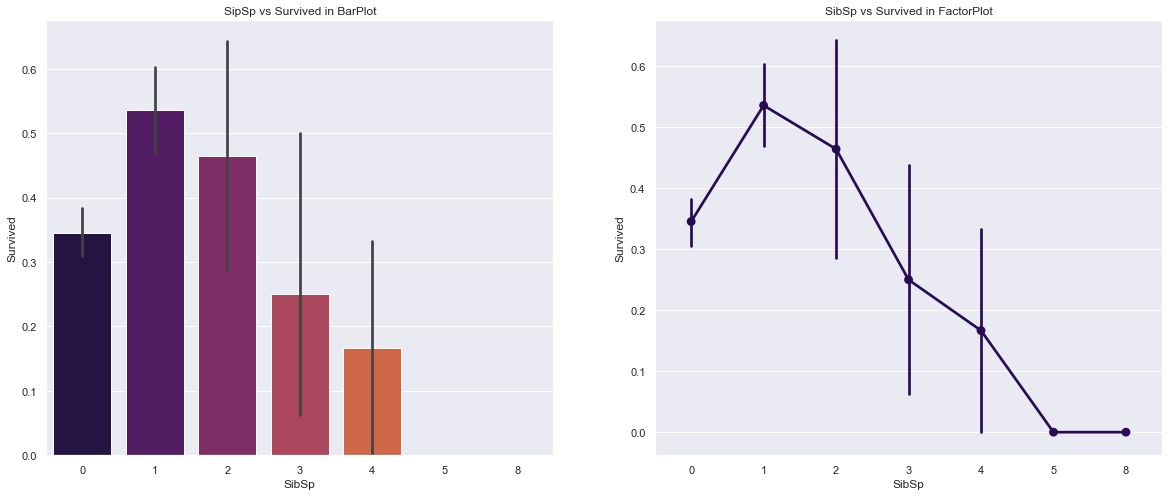

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived', data=train,ax=ax[0], palette="inferno")
ax[0].set_title('SipSp vs Survived in BarPlot')
sns.factorplot('SibSp','Survived', data=train,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show()

In [19]:
pd.crosstab(train['Survived'], train['Embarked']).apply(lambda r: round(r/len(train) *100 ,2), axis=1)

Embarked,C,Q,S,missing
Survived,,,,
0,8.42,5.27,47.92,0.00
1,10.44,3.37,24.35,0.22


In [24]:
train.drop(['Name','Ticket','PassengerId'], axis=1,inplace=True)
test.drop(['Name','Ticket','PassengerId'], axis=1,inplace=True)

In [25]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22,1,0,7.2500,missing,S
1,1,1,female,38,1,0,71.2833,C85,C
2,1,3,female,26,0,0,7.9250,missing,S
3,1,1,female,35,1,0,53.1000,C123,S
4,0,3,male,35,0,0,8.0500,missing,S


# Feature Engineering

In [39]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.742985,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.011583,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
x=train.select_dtypes(include=['object'])
x=x.apply(LabelEncoder().fit_transform)
train.drop(x.columns, axis=1,inplace=True)
train=pd.concat([train, x], axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked
0,0,3,22,1,0,7.2500,1,147,2
1,1,1,38,1,0,71.2833,0,81,0
2,1,3,26,0,0,7.9250,0,147,2
3,1,1,35,1,0,53.1000,0,55,2
4,0,3,35,0,0,8.0500,1,147,2


In [42]:
x=test.select_dtypes(include=['object'])
x=x.apply(LabelEncoder().fit_transform)
test.drop(x.columns, axis=1,inplace=True)
test=pd.concat([test, x], axis=1)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked
0,3,34,0,0,7.8292,1,76,1
1,3,47,1,0,7.0000,0,76,2
2,2,62,0,0,9.6875,1,76,1
3,3,27,0,0,8.6625,1,76,2
4,3,22,1,1,12.2875,0,76,2


## Train and Test Split

In [50]:
x= train.drop('Survived',axis=1)
y=train['Survived']

In [51]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size=0.2, random_state=42)

## Model Training

In [57]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

### Decision Tree Classifier

In [58]:
clf=DecisionTreeClassifier(class_weight='balanced',min_impurity_split=None,max_depth=6, splitter='best')
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
ypred=clf.predict(xtest)
pd.crosstab(ytest, ypred,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,93,12,105
1,18,56,74
All,111,68,179


In [60]:
print(accuracy_score(ytest, ypred))

0.8324022346368715


### Logistic Regression

In [61]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)
acc_log = round(logreg.score(xtrain, ytrain) * 100, 2)
acc_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.48

### XGBoost

In [69]:
xgboost = xgb.XGBClassifier( n_estimators=500, learning_rate=0.01).fit(xtrain, ytrain)
xgb_prediction = xgboost.predict(xtest)
xgb_score=accuracy_score(ytest, xgb_prediction)
print(xgb_score)

0.7988826815642458


### Random Forest 

In [55]:
rfc = RandomForestClassifier()
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }
grid_obj = GridSearchCV(rfc, parameters, scoring=make_scorer(accuracy_score))
grid_obj = grid_obj.fit(xtrain, ytrain)
rfc = grid_obj.best_estimator_
rfc.fit(xtrain, ytrain)
rfc_prediction = rfc.predict(xtest)
rfc_score=accuracy_score(ytest, rfc_prediction)
print(rfc_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8212290502793296


Out of Four models trained, Three models i.e. Decision Tree, Logistic Regression , Random Forest give accuracy above 80%.